In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
digits= load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

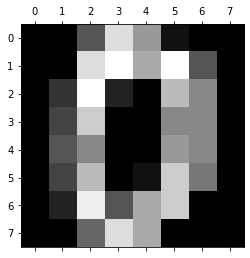

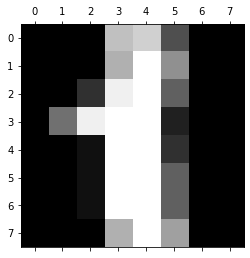

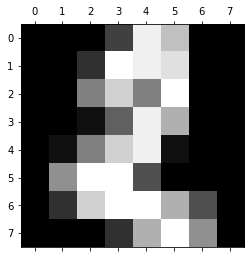

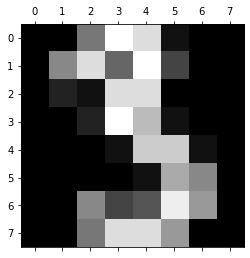

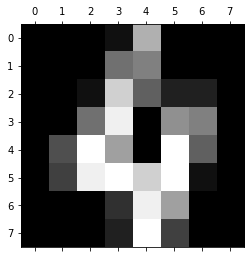

In [5]:
plt.gray()
for i in digits.images[:5]:
    plt.matshow(i)

In [6]:
digits.target[:5]

array([0, 1, 2, 3, 4])

### LOGISTIC REGRESSION

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [9]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [10]:
model.score(X_test,y_test)

0.9694444444444444

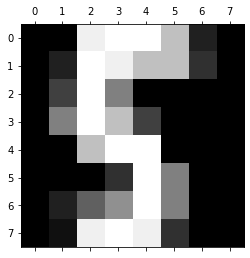

In [11]:
plt.matshow(digits.images[109])

In [12]:
digits.target[109]

5

In [13]:
model.predict([digits.data[109]])

array([5])

In [15]:
cm=confusion_matrix(y_test,model.predict(X_test))
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  1,  0, 35,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 37]], dtype=int64)

Text(69.0, 0.5, 'Truth')

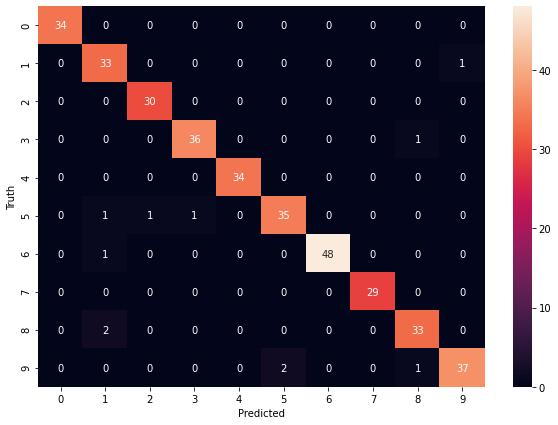

In [16]:
plt.figure(figsize=(10,7))
heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### SUPPORT VECTOR MACHINE

In [25]:
from sklearn.svm import SVC

0.9916666666666667

In [32]:
np.linspace(0.1,10, 100)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ])

In [43]:
max_score=0
i_max=0
for i in  np.linspace(0.1,10, 100):  
    model_svm = SVC(C=i)
    model_svm.fit(X_train,y_train)
    x=model_svm.score(X_test,y_test)
    if x>max_score:
        max_score=x
        i_max=i
        
print(max_score,i_max)

0.9916666666666667 1.9000000000000001


In [44]:
max_score=0
i_max=0
for i in   ['linear', 'poly', 'rbf', 'sigmoid']:  
    model_svm = SVC(C=1.9,kernel =i)
    model_svm.fit(X_train,y_train)
    x=model_svm.score(X_test,y_test)
    if x>max_score:
        max_score=x
        i_max=i
print(max_score,i_max)

0.9916666666666667 rbf


In [45]:
model_svm = SVC(C=1.9,gamma='scale',kernel='rbf')
model_svm.fit(X_train,y_train)
model_svm.score(X_test,y_test)

0.9916666666666667

Text(69.0, 0.5, 'Truth')

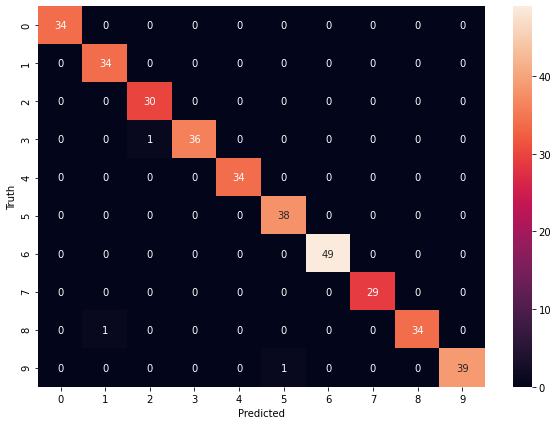

In [46]:
cm=confusion_matrix(y_test,model_svm.predict(X_test))
plt.figure(figsize=(10,7))
heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### RANDOM FOREST CLASSIFIER

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model_rf=RandomForestClassifier(n_estimators=20)
model_rf.fit(X_train,y_train)
model_rf.score(X_test,y_test)

0.9666666666666667

Text(69.0, 0.5, 'Truth')

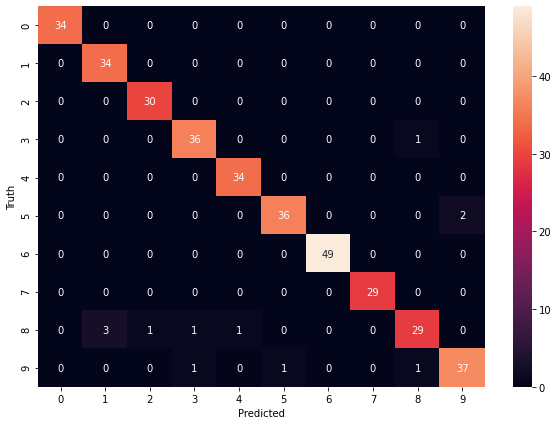

In [54]:
cm=confusion_matrix(y_test,model_rf.predict(X_test))
plt.figure(figsize=(10,7))
heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')